In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fb_camp = pd.read_csv("facebook_ads_data (2.0).csv")

fb_camp['ad_date'] = pd.to_datetime(fb_camp['ad_date'])
fb_camp.head()

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817


In [3]:
#1 Зроби групування даних по дням та для згрупованих даних побудуй два графіки:

fb_camp_21 = fb_camp[fb_camp['ad_date'].dt.year == 2021]
fb_camp_21.head()

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
274,2021-12-31,Lookalike,143.19,24699,194,138.86,0.74,5.80,0.007855,0.969760
275,2021-12-31,Trendy,8.82,25345,63,16.32,0.14,0.35,0.002486,1.850340
276,2021-12-31,Wholesale,21.37,6705,24,27.93,0.89,3.19,0.003579,1.306972
277,2021-12-30,Lookalike,227.56,44527,897,243.02,0.25,5.11,0.020145,1.067938
278,2021-12-30,Trendy,31.92,8833,58,63.67,0.55,3.61,0.006566,1.994674


     ad_date  total_spend
0 2021-01-01         0.39
1 2021-01-02         7.74
2 2021-01-04        70.06
3 2021-01-05        81.15
4 2021-01-06       142.77


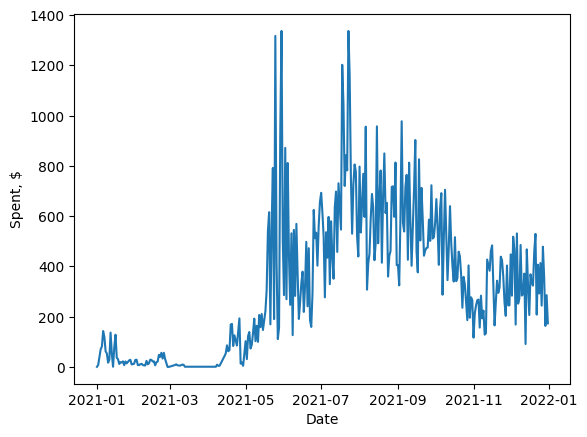

In [4]:
# Answer 1-1: Графік з щоденною сумою витрат на рекламу в 2021 році

grouped_days_spend = fb_camp_21.groupby('ad_date', as_index=False)['total_spend'].sum()

sns.lineplot(grouped_days_spend, x='ad_date', y='total_spend')
plt.xlabel('Date')
plt.ylabel('Spent, $')

print(grouped_days_spend.head())

In [5]:
# IMP! cannot group romi or ctr from the original df, because only the PRIMARY values can be aggregated. 
# romi & ctr need to be reconted after the aggregation of the primary values

grouped_days_21 = fb_camp_21.groupby('ad_date', as_index=False)[['total_spend', 'total_value', 'total_impressions', 'total_clicks']].sum()

print(grouped_days_21.tail())

       ad_date  total_spend  total_value  total_impressions  total_clicks
324 2021-12-27       478.31       686.47             103725           504
325 2021-12-28       359.83       450.47             101788           499
326 2021-12-29       163.25       171.76              32290           435
327 2021-12-30       285.67       330.26              64171           984
328 2021-12-31       173.38       183.11              56749           281


In [6]:
grouped_days_21["cpc"] = grouped_days_21["total_spend"] / grouped_days_21["total_clicks"]
grouped_days_21["cpm"] = (grouped_days_21["total_spend"] * 1000 ) / grouped_days_21["total_impressions"]
grouped_days_21["ctr"] = grouped_days_21["total_clicks"] / grouped_days_21["total_impressions"]
grouped_days_21["romi"] = grouped_days_21["total_value"] / grouped_days_21["total_spend"] - 1

print(grouped_days_21.head())

     ad_date  total_spend  total_value  total_impressions  total_clicks  \
0 2021-01-01         0.39         0.59                353             0   
1 2021-01-02         7.74         6.90              10709           205   
2 2021-01-04        70.06        68.47              22440          1256   
3 2021-01-05        81.15        61.68              60232          1379   
4 2021-01-06       142.77       145.97              65265           431   

        cpc       cpm       ctr      romi  
0       inf  1.104816  0.000000  0.512821  
1  0.037756  0.722757  0.019143 -0.108527  
2  0.055780  3.122103  0.055971 -0.022695  
3  0.058847  1.347290  0.022895 -0.239926  
4  0.331253  2.187543  0.006604  0.022414  


In [7]:
# # Few extra useful graphs
# grouped_days_spend_test1 = fb_camp_21.groupby(['ad_date', 'campaign_name'], as_index=False)['total_spend'].sum()

# sns.lineplot(data=grouped_days_spend_test1, x='ad_date', y='total_spend', hue='campaign_name')
# plt.xlabel('Date')
# plt.ylabel('Spent, $')


# grouped_days_spend_test2 = fb_camp_21.groupby(['ad_date', 'campaign_name'], as_index=False)['total_spend'].sum()

# sns.scatterplot(data=grouped_days_spend_test2, x='ad_date', y='total_spend', hue='campaign_name', s=10)
# plt.xlabel('Date')
# plt.ylabel('Spent, $')


# ax = sns.countplot(data=fb_camp_21, x='campaign_name')
# ax.set_xticklabels(fb_camp_21['campaign_name'], rotation = 45)
# plt.xlabel('Campaign')
# plt.ylabel('Count, $')

Text(0, 0.5, 'ROMI')

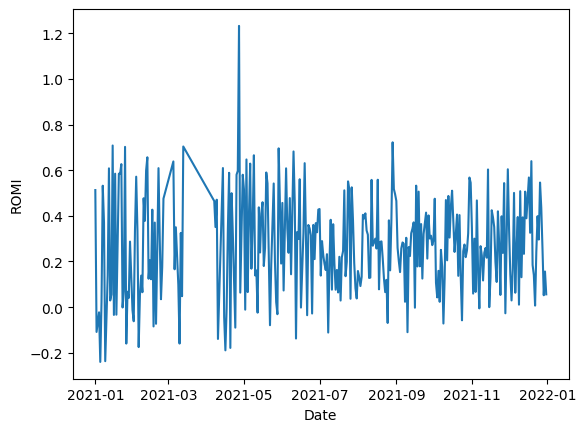

In [8]:
# Answer 1-2: Графік з щоденним ROMI в 2021 році

grouped_days_romi = grouped_days_21.groupby('ad_date', as_index=False)['romi'].mean()

sns.lineplot(grouped_days_romi, x='ad_date', y='romi')
plt.xlabel('Date')
plt.ylabel('ROMI')

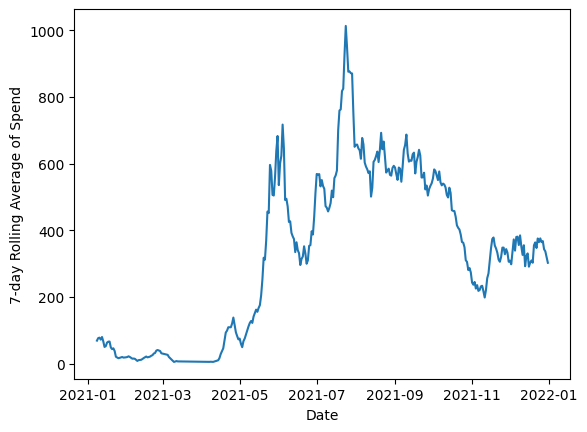

In [9]:
# Answer 1-3-1: Bonus: застосуй метод rolling() щоб відобразити рухоме середнє витрат

grouped_days_spend['total_spend_rolling7'] = grouped_days_spend['total_spend'].rolling(window=7).mean()

sns.lineplot(data=grouped_days_spend, x='ad_date', y='total_spend_rolling7')
plt.xlabel('Date')
plt.ylabel('7-day Rolling Average of Spend')
plt.show()


In [10]:
# # useful graph: grouping by month

# grouped_monthly_spend = fb_camp_21.groupby(pd.Grouper(key='ad_date', freq='M'))['total_spend'].sum().reset_index()

# sns.lineplot(data=grouped_monthly_spend, x='ad_date', y='total_spend', marker='*', markersize=20, markeredgecolor='r', markerfacecolor='r')
# plt.xlabel('Month')
# plt.ylabel('Total Spend ($)')
# plt.title('Monthly Total Spend in 2021')
# plt.xticks(rotation=45)
# plt.show()

In [11]:
# # Useful: signing each value on graph

# import matplotlib.pyplot as plt
# import seaborn as sns

# grouped_monthly_spend = fb_camp_21.groupby(pd.Grouper(key='ad_date', freq='M'))['total_spend'].sum().reset_index()

# # Create the line plot
# sns.lineplot(data=grouped_monthly_spend, x='ad_date', y='total_spend', marker='x', markersize=10, markeredgecolor='r', markerfacecolor='r')

# # Annotate each point with its corresponding value
# for i in range(len(grouped_monthly_spend)):
#     plt.text(grouped_monthly_spend['ad_date'].iloc[i], grouped_monthly_spend['total_spend'].iloc[i],
#              round(grouped_monthly_spend['total_spend'].iloc[i], 2), 
#              color='black', ha='center', va='bottom', fontsize=9)

# # Labeling the axes and title
# plt.xlabel('Month')
# plt.ylabel('Total Spend ($)')
# plt.title('Monthly Total Spend in 2021')

# # Rotate x-axis labels
# plt.xticks(rotation=45)

# # Display the plot
# plt.show()


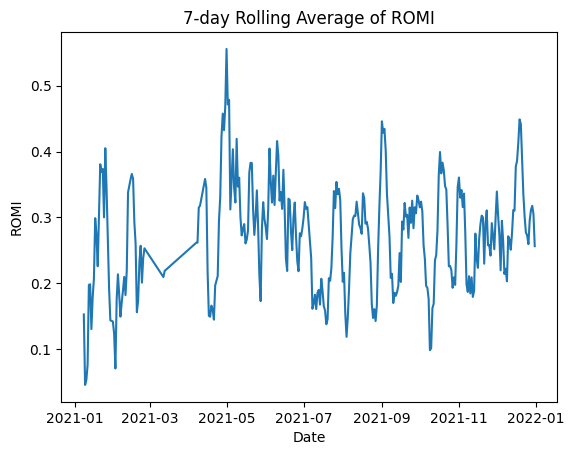

In [12]:
# Answer 1-3-2: Bonus: застосуй метод rolling() щоб відобразити рухоме середнє ROMI

grouped_days_romi['romi_rolling7'] = grouped_days_romi['romi'].rolling(window=7).mean()

sns.lineplot(data=grouped_days_romi, x='ad_date', y='romi_rolling7')
plt.xlabel('Date')
plt.ylabel('ROMI')
plt.title("7-day Rolling Average of ROMI")
plt.show()

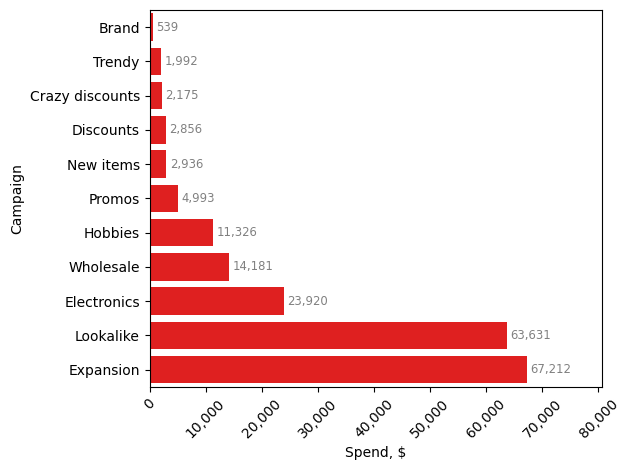

In [13]:
#2 Зроби групування даних за назвою кампанії побудуй два графіки:
# Answer 1 - Графік загальної суми витрат на рекламу в кожній з кампаній:

import matplotlib.ticker as ticker

fb_camp_spend = fb_camp.groupby('campaign_name')['total_spend'].sum()
fb_camp_spend = fb_camp_spend.sort_values()

sns.barplot(x=fb_camp_spend.values, y=fb_camp_spend.index, color="r")

plt.xlabel('Spend, $')
plt.ylabel('Campaign')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xticks(rotation=45)
plt.xlim(0, fb_camp_spend.max() * 1.2)

for i in range(len(fb_camp_spend)):
    value = fb_camp_spend.values[i]
    campaign = fb_camp_spend.index[i]
    plt.text(value + fb_camp_spend.max()*0.01, i, f'{int(value):,}', va='center', color='gray', fontsize='small')
plt.tight_layout()

plt.show()

In [14]:
# # useful: giving label a name

# import matplotlib.ticker as ticker

# fb_camp_spend = fb_camp.groupby('campaign_name')['total_spend'].sum()
# fb_camp_spend = fb_camp_spend.sort_values()

# sns.barplot(x=fb_camp_spend.values, y=fb_camp_spend.index, color="r")

# plt.xlabel('Spend, $')
# plt.ylabel('Campaign')
# plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
# plt.xticks(rotation=45)
# plt.xlim(0, fb_camp_spend.max() * 1.2)

# for i in range(len(fb_camp_spend)):
#     value = fb_camp_spend.values[i]
#     campaign = fb_camp_spend.index[i]
#     plt.text(value + fb_camp_spend.max()*0.01, i, f'{int(value):,}', va='center', color='gray', fontsize='small')
# plt.tight_layout()

# plt.show()

In [15]:
grouped_camp = fb_camp.groupby('campaign_name', as_index=False)[['total_spend', 'total_value', 'total_impressions', 'total_clicks']].sum()

print(grouped_camp.tail())

   campaign_name  total_spend  total_value  total_impressions  total_clicks
6      Lookalike     63631.09     80234.70           21019388        220993
7      New items      2936.97      3742.05            1045294         16935
8         Promos      4993.84      8793.77            2216422         17315
9         Trendy      1992.31      3798.90            1392189          9725
10     Wholesale     14181.71     17421.33            2902356         18185


In [16]:
grouped_camp["cpc"] = grouped_camp["total_spend"] / grouped_camp["total_clicks"]
grouped_camp["cpm"] = (grouped_camp["total_spend"] * 1000 ) / grouped_camp["total_impressions"]
grouped_camp["ctr"] = grouped_camp["total_clicks"] / grouped_camp["total_impressions"]
grouped_camp["romi"] = grouped_camp["total_value"] / grouped_camp["total_spend"] - 1

print(grouped_camp.head())

     campaign_name  total_spend  total_value  total_impressions  total_clicks  \
0            Brand       539.92       670.15             893854           542   
1  Crazy discounts      2175.29      2583.59            1401511         19627   
2        Discounts      2856.39      3516.27            1256069         33353   
3      Electronics     23920.42     29169.38            7070770         51593   
4        Expansion     67212.82     83288.66            3736092         37469   

        cpc        cpm       ctr      romi  
0  0.996162   0.604036  0.000606  0.241202  
1  0.110832   1.552103  0.014004  0.187699  
2  0.085641   2.274071  0.026553  0.231019  
3  0.463637   3.383001  0.007297  0.219434  
4  1.793825  17.990140  0.010029  0.239178  


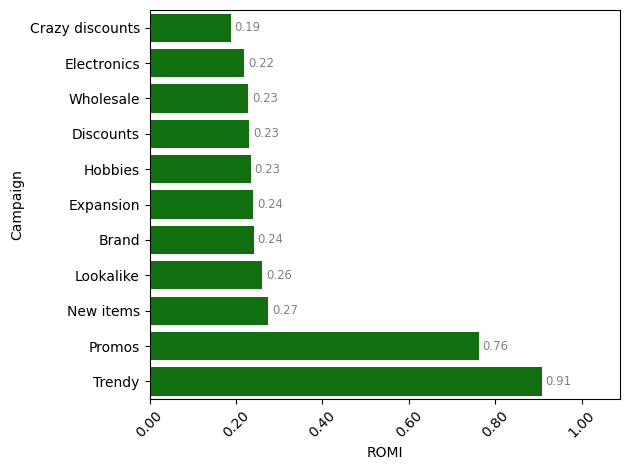

In [17]:
# Answer 2 - Загальний ROMI в кожній з кампаній

import matplotlib.ticker as ticker

fb_camp_romi = grouped_camp.groupby('campaign_name')['romi'].mean()
fb_camp_romi = fb_camp_romi.sort_values()

sns.barplot(x=fb_camp_romi.values, y=fb_camp_romi.index, color="g")

plt.xlabel('ROMI')
plt.ylabel('Campaign')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.2f}'))
plt.xticks(rotation=45)
plt.xlim(0, fb_camp_romi.max() * 1.2)

for i in range(len(fb_camp_romi)):
    value = fb_camp_romi.values[i]
    campaign = fb_camp_romi.index[i]
    plt.text(value + fb_camp_romi.max()*0.01, i, f'{value:.2f}', va='center', color='gray', fontsize='small')
plt.tight_layout()

plt.show()

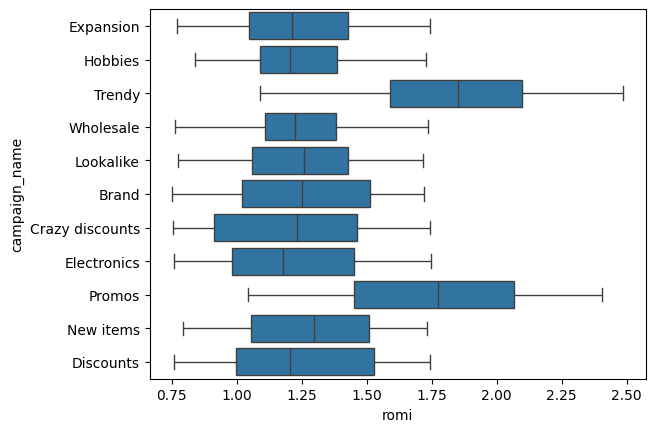

,min,50%,max
campaign_name,,,
Brand,0.751445,1.249643,1.720930
Crazy discounts,0.754151,1.231791,1.743041
Discounts,0.760074,1.204944,1.742779
Electronics,0.758395,1.177034,1.746088
Expansion,0.769136,1.212200,1.744752
Hobbies,0.838471,1.206425,1.727572
Lookalike,0.775464,1.260181,1.717083
New items,0.793797,1.295652,1.733367
Promos,1.044944,1.775666,2.407083


In [18]:
#3 За допомогою box plot визнач, яким був розкид щоденного ROMI в кожній кампаній (за назвою кампанії.)
# Answer:

sns.boxplot(fb_camp, x='romi', y='campaign_name')
plt.show()

romi_stats = fb_camp.groupby('campaign_name')['romi'].describe()[['min', '50%', 'max']]

romi_stats.head(15)

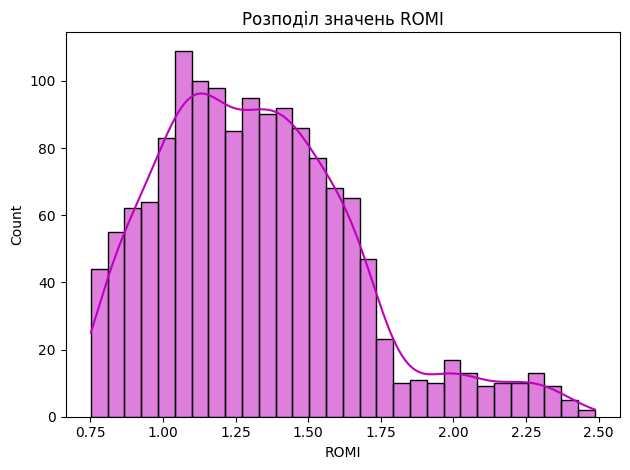

In [19]:
#4 Побудуй гістограму з розподілом значень ROMI в таблиці facebook_ads_data.csv
# Answer:

sns.histplot(data=fb_camp, x='romi', kde=True, color='m', bins=30)
plt.xlabel("ROMI")
plt.title("Pозподіл значень ROMI")
plt.tight_layout()

plt.show()

In [20]:
#5 Побудуй теплову карту кореляції між усіма числовими показниками в таблиці facebook_ads_data.csv.

fb_camp.head()
fb_camp.dtypes
fb_camp.corr(numeric_only=True)

,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
total_spend,1.000000,0.475607,0.480066,0.978890,0.262254,0.482027,-0.025495,-0.114859
total_impressions,0.475607,1.000000,0.765489,0.472037,-0.093097,-0.121094,-0.155701,-0.099520
total_clicks,0.480066,0.765489,1.000000,0.472124,-0.159521,-0.032829,0.200440,-0.101495
total_value,0.978890,0.472037,0.472124,1.000000,0.250851,0.471338,-0.022267,-0.013733
cpc,0.262254,-0.093097,-0.159521,0.250851,1.000000,0.593732,-0.210719,-0.076911
cpm,0.482027,-0.121094,-0.032829,0.471338,0.593732,1.000000,0.116213,-0.062676
ctr,-0.025495,-0.155701,0.200440,-0.022267,-0.210719,0.116213,1.000000,-0.049992
romi,-0.114859,-0.099520,-0.101495,-0.013733,-0.076911,-0.062676,-0.049992,1.000000


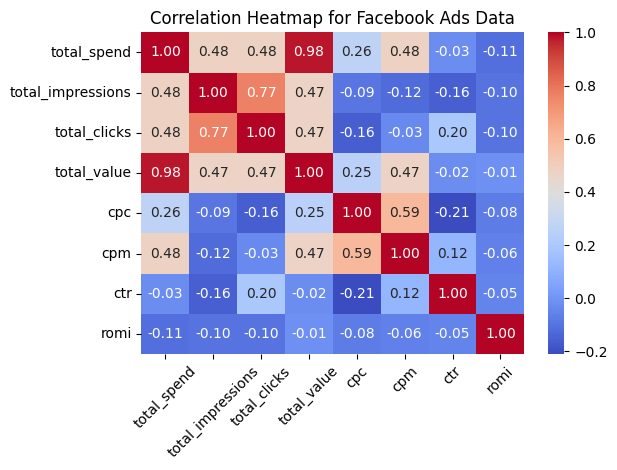

In [21]:
# Answer 1:

ax = sns.heatmap(fb_camp.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title("Correlation Heatmap for Facebook Ads Data")
plt.tight_layout()
plt.show()

In [22]:
# # useful: moving x labels left to be more aligned to tickmarks

# import matplotlib.transforms as mtrans

# ax = sns.heatmap(fb_camp.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# plt.title("Correlation Heatmap for Facebook Ads Data")

# # Move x-tick labels to the left
# trans = mtrans.Affine2D().translate(-20, 0)  # use negative value to move left
# for t in ax.get_xticklabels():
#     t.set_transform(t.get_transform() + trans)

# plt.tight_layout()
# plt.show()


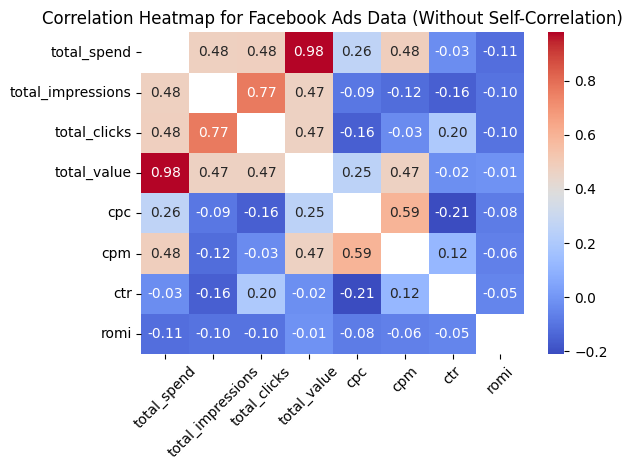

In [23]:
corr_matrix = fb_camp.corr(numeric_only=True)

# Step 1: Remove self-correlations
corr_no_self = corr_matrix.copy()
for col in corr_no_self.columns:
    corr_no_self.loc[col, col] = np.nan

# Step 2: Plot the heatmap without self-correlations
ax = sns.heatmap(corr_no_self, annot=True, cmap='coolwarm', fmt=".2f")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title("Correlation Heatmap for Facebook Ads Data (Without Self-Correlation)")
plt.tight_layout()
plt.show()

In [24]:
# Answer 5-2: Які показники мають найвищу та найнижчу кореляцію? 

# Step 2: Find the highest and lowest correlation values
# Now we can find the max and min values in the updated matrix:

# Find the highest absolute correlation
max_corr_value = corr_no_self.abs().max().max()

# Find which pair has that value
for col in corr_no_self.columns:
    for row in corr_no_self.index:
        if corr_no_self.loc[row, col] == max_corr_value:
            print("Найвища кореляція:", row, "<->", col, "→", corr_matrix.loc[row, col])

# Same idea for the lowest:

# Find the smallest absolute correlation
min_corr_value = corr_no_self.min().min()

for col in corr_no_self.columns:
    for row in corr_no_self.index:
        if corr_no_self.loc[row, col] == min_corr_value:
            print("Найнижча кореляція:", row, "<->", col, "→", corr_matrix.loc[row, col])

Найвища кореляція: total_value <-> total_spend → 0.978889925874156
Найвища кореляція: total_spend <-> total_value → 0.978889925874156
Найнижча кореляція: ctr <-> cpc → -0.2107190927671994
Найнижча кореляція: cpc <-> ctr → -0.2107190927671994


In [25]:
# З чим корелює "total_value"?

print("Кореляція 'total_value' з іншими показниками:")
print(corr_matrix["total_value"].sort_values(ascending=False))

Кореляція 'total_value' з іншими показниками:
total_value          1.000000
total_spend          0.978890
total_clicks         0.472124
total_impressions    0.472037
cpm                  0.471338
cpc                  0.250851
romi                -0.013733
ctr                 -0.022267
Name: total_value, dtype: float64


<Axes: xlabel='total_value', ylabel='total_spend'>

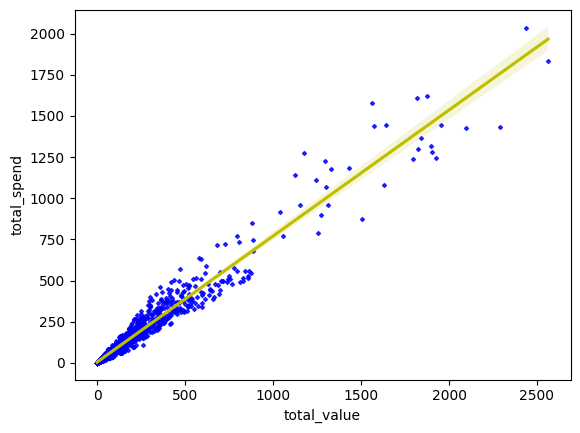

In [26]:
#6 Побудуй точкову діаграму з лінійною регресією, що побудована на даних з 
# "total_spend" та "total_value" щоб візуалізувати звʼязок між цими величинами.

#Answer:

sns.regplot(fb_camp, x='total_value', y='total_spend', color = 'y', 
            scatter_kws = {'color' : 'b', 's' : 4}, marker = 'D')

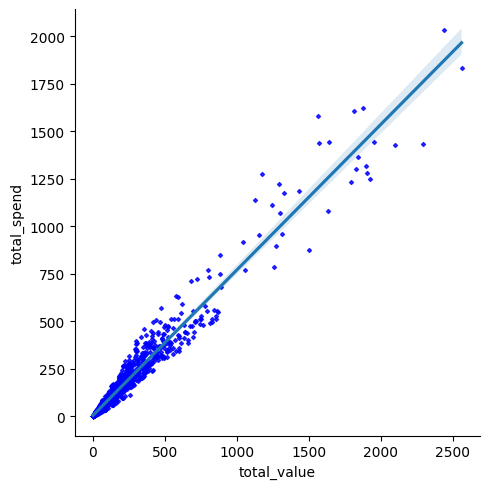

In [27]:
sns.lmplot(fb_camp, x='total_value', y='total_spend',
            scatter_kws = {'color' : 'b', 's' : 4}, markers = 'D')

In [28]:
?sns.lmplot

Signature:
sns.lmplot(
    data,
    *,
    x=None,
    y=None,
    hue=None,
    col=None,
    row=None,
    palette=None,
    col_wrap=None,
    height=5,
    aspect=1,
    markers='o',
    sharex=None,
    sharey=None,
    hue_order=None,
    col_order=None,
    row_order=None,
    legend=True,
    legend_out=None,
    x_estimator=None,
    x_bins=None,
    x_ci='ci',
    scatter=True,
    fit_reg=True,
    ci=95,
    n_boot=1000,
    units=None,
    seed=None,
    order=1,
    logistic=False,
    lowess=False,
    robust=False,
    logx=False,
    x_partial=None,
    y_partial=None,
    truncate=True,
    x_jitter=None,
    y_jitter=None,
    scatter_kws=None,
    line_kws=None,
    facet_kws=None,
)
Docstring:
Plot data and regression model fits across a FacetGrid.

This function combines :func:`regplot` and :class:`FacetGrid`. It is
intended as a convenient interface to fit regression models across
conditional subsets of a dataset.

When thinking about how to assign variables to 